# seaborn_Structured grids
- 官网手册目录（http://seaborn.pydata.org/tutorial.html）
  > - Style management
  > - Plotting functions
  > - Structured grids

- Structured grids
  > - Plotting on data-aware grids
  >  > - Subsetting data with FacetGrid
  >  > - Plotting pairwise relationships with PairGrid and pairplot()

## 一、Plotting on data-aware grids
- 数据结构需为Pandas DataFrame，且列为变量，行为样本
> - your data has to be in a Pandas DataFrame and it must take the form of what Hadley Whickam calls “tidy” data. 
> - In brief, that means your dataframe should be structured such that each column is a variable and each row is an observation.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set(style="ticks")
np.random.seed(sum(map(ord, "axis_grids")))

### 1 Subsetting data with FacetGrid
- The FacetGrid class is useful when you want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset. A FacetGrid can be drawn with up to three dimensions: row, col, and hue. The first two have obvious correspondence with the resulting array of axes; think of the hue variable as a third dimension along a depth axis, where different levels are plotted with different colors.

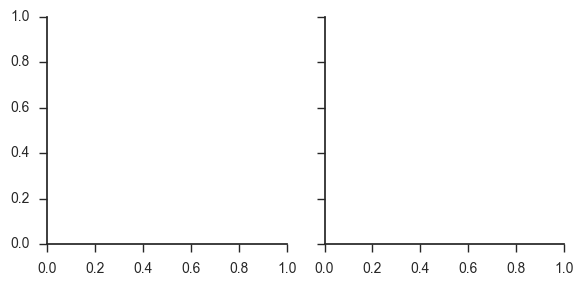

In [3]:
tips = sns.load_dataset("tips")

g = sns.FacetGrid(tips, col="time")

- 用FacetGrid.map()方法绘图
> - Provide it with a plotting function and the name(s) of variable(s) in the dataframe to plot.

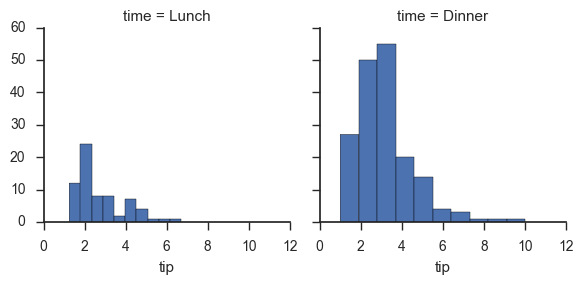

In [4]:
g = sns.FacetGrid(tips, col="time")
g.map(plt.hist, "tip");

- 传递多变量以绘制它们的关系图
> - To make a relational plot, just pass multiple variable names. 
> - You can also provide keyword arguments, which will be passed to the plotting function:

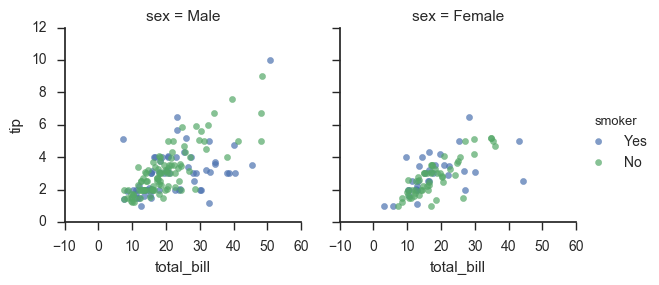

In [5]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend();

- 控制网格外观的参数
> - There are several options for controlling the look of the grid that can be passed to the class constructor.
- margin_titles 参数的支持还不完善
> - Note that margin_titles isn’t formally supported by the matplotlib API, and may not work well in all cases. 
> - In particular, it currently can’t be used with a legend that lies outside of the plot.

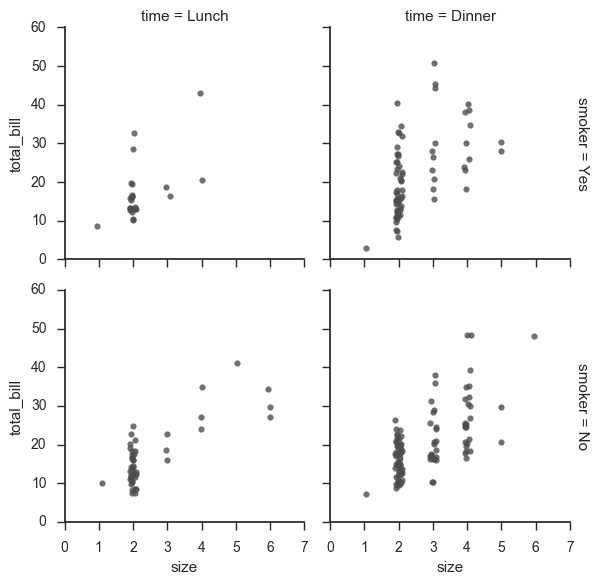

In [6]:
g = sns.FacetGrid(tips, row="smoker", col="time", margin_titles=True)
g.map(sns.regplot, "size", "total_bill", color=".3", fit_reg=False, x_jitter=.1);

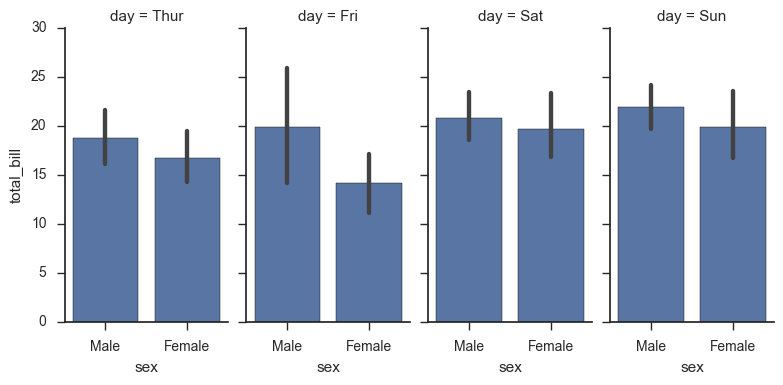

In [7]:
# The size of the figure is set by providing 
# the height of each facet, along with the aspect ratio:
g = sns.FacetGrid(tips, col="day", size=4, aspect=.5)
g.map(sns.barplot, "sex", "total_bill");

- 使用gridspec模块传递参数，控制图形中各部分的相对大小。特别适用于各个变量具有不同的分组数目时。
> - With versions of matplotlib > 1.4, you can pass parameters to be used in the gridspec module. 
> - The can be used to draw attention to a particular facet by increasing its size. 
> - It’s particularly useful when visualizing distributions of datasets with unequal numbers of groups in each facet.

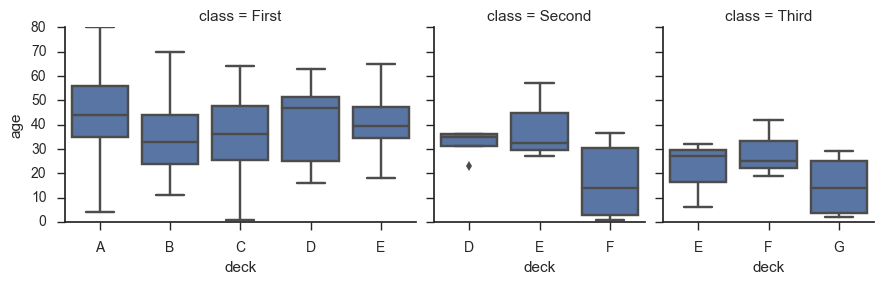

In [29]:
titanic = sns.load_dataset("titanic")
titanic = titanic.assign(deck=titanic.deck.astype(object)).sort_values("deck")
g = sns.FacetGrid(titanic, col="class", sharex=False,
                  gridspec_kws={"width_ratios": [5, 3, 3]})
g.map(sns.boxplot, "deck", "age");

- 图形各部分的排列顺序，默认自动提取顺序，也可自己通过参数*_order指定
> - The default ordering of the facets is derived from the information in the DataFrame. > - If the variable used to define facets has a categorical type, then the order of the categories is used. 
> - Otherwise, the facets will be in the order of appearence of the category levels. It is possible, however, to specify an ordering of any facet dimension with the appropriate *_order parameter:

D:\software\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


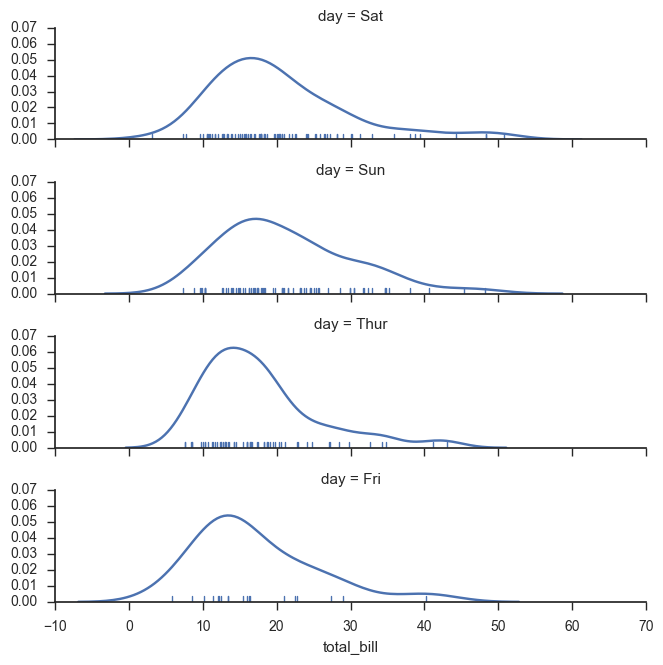

In [9]:
ordered_days = tips.day.value_counts().index
g = sns.FacetGrid(tips, row="day", row_order=ordered_days,
                  size=1.7, aspect=4,)
g.map(sns.distplot, "total_bill", hist=False, rug=True);

- 颜色。color_palette()，或者变量hue。
> - Any seaborn color palette (i.e., something that can be passed to color_palette() can be provided. 
> - You can also use a dictionary that maps the names of values in the hue variable to valid matplotlib colors:

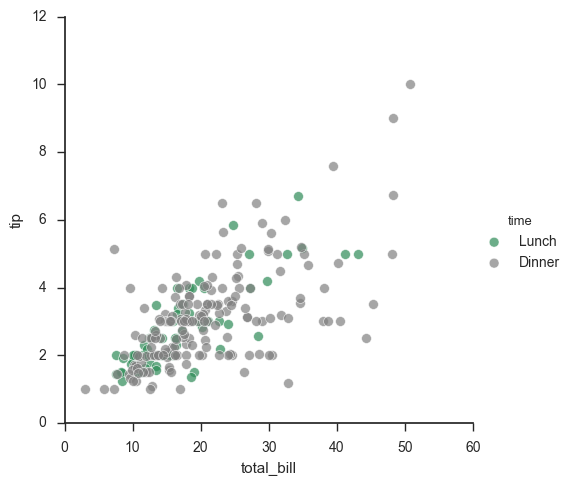

In [10]:
pal = dict(Lunch="seagreen", Dinner="gray")
g = sns.FacetGrid(tips, hue="time", palette=pal, size=5)
g.map(plt.scatter, "total_bill", "tip", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend();

- 变化显示的图形。hue_kws参数，字典形式。
> - You can also let other aspects of the plot vary across levels of the hue variable, which can be helpful for making plots that will be more comprehensible when printed in black-and-white. 
> - To do this, pass a dictionary to hue_kws where keys are the names of plotting function keyword arguments and values are lists of keyword values, one for each level of the hue variable.

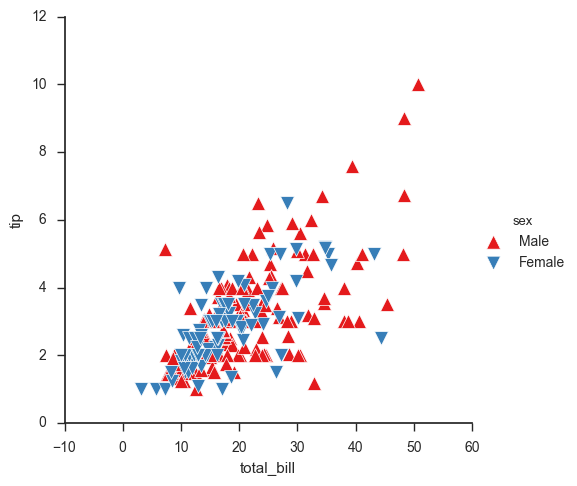

In [11]:
g = sns.FacetGrid(tips, hue="sex", palette="Set1", size=5, hue_kws={"marker": ["^", "v"]})
g.map(plt.scatter, "total_bill", "tip", s=100, linewidth=.5, edgecolor="white")
g.add_legend();

- 一个变量多个水平，沿着列画图
> - If you have many levels of one variable, you can plot it along the columns but “wrap” them so that they span multiple rows. 
> - When doing this, you cannot use a row variable.

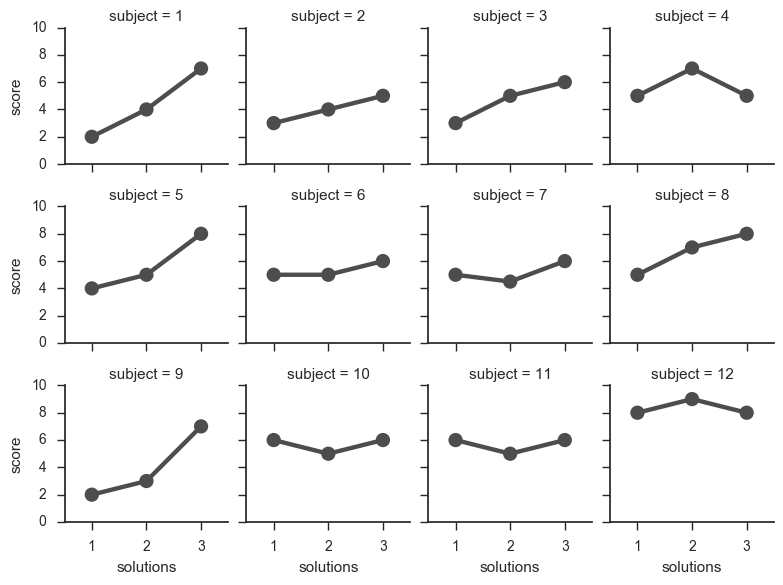

In [12]:
attend = sns.load_dataset("attention").query("subject <= 12")
g = sns.FacetGrid(attend, col="subject", col_wrap=4, size=2, ylim=(0, 10))
g.map(sns.pointplot, "solutions", "score", color=".3", ci=None);

- 使用FacetGrid.map()绘图后调整图形的某个方面，使用一般方法FacetGrid.set()，或特定方法FacetGrid.set_axis_labels()等
> - The most general is FacetGrid.set(), and there are other more specialized methods like FacetGrid.set_axis_labels(), which respects the fact that interior facets do not have axis labels

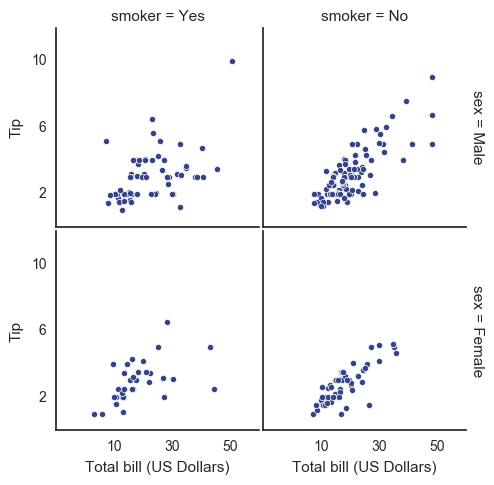

In [13]:
with sns.axes_style("white"):
    g = sns.FacetGrid(tips, row="sex", col="smoker", margin_titles=True, size=2.5)
g.map(plt.scatter, "total_bill", "tip", color="#334488", edgecolor="white", lw=.5);
g.set_axis_labels("Total bill (US Dollars)", "Tip");
g.set(xticks=[10, 30, 50], yticks=[2, 6, 10]);
g.fig.subplots_adjust(wspace=.02, hspace=.02);

- 如果想更加个性化，可直接使用matplotlib Figure and Axes objects，即fig and axes
> - For even more customization, you can work directly with the underling matplotlib Figure and Axes objects, which are stored as member attributes at fig and axes (a two-dimensional array), respectively. 
> - When making a figure without row or column faceting, you can also use the ax attribute to directly access the single axes.

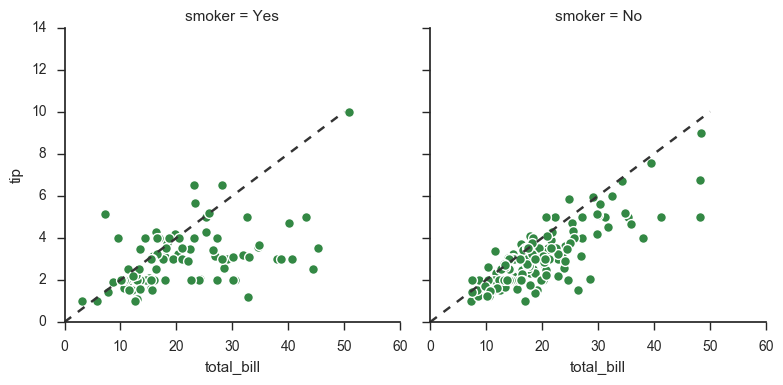

In [14]:
g = sns.FacetGrid(tips, col="smoker", margin_titles=True, size=4)
g.map(plt.scatter, "total_bill", "tip", color="#338844", edgecolor="white", s=50, lw=1)
for ax in g.axes.flat:
    ax.plot((0, 50), (0, .2 * 50), c=".2", ls="--")
g.set(xlim=(0, 60), ylim=(0, 14));

#### 1.1 映射个人函数到网格上（Mapping custom functions onto the grid）
-  to work properly, any function you use must follow a few rules:
> - It must plot onto the “currently active” matplotlib Axes. This will be true of functions in the matplotlib.pyplot namespace, and you can call plt.gca to get a reference to the current Axes if you want to work directly with its methods.
> - It must accept the data that it plots in positional arguments. Internally, FacetGrid will pass a Series of data for each of the named positional arguments passed to FacetGrid.map().
> - It must be able to accept color and label keyword arguments, and, ideally, it will do something useful with them. In most cases, it’s easiest to catch a generic dictionary of **kwargs and pass it along to the underlying plotting function.

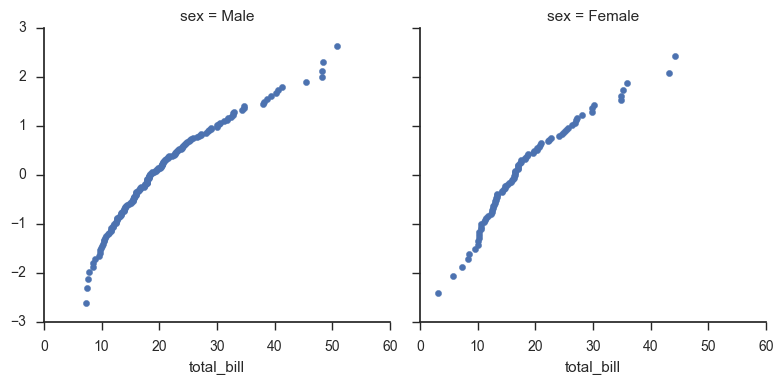

In [15]:
# This function will just take a single vector of data for each facet
def quantile_plot(x, **kwargs): 
    qntls, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, qntls, **kwargs)

g = sns.FacetGrid(tips, col="sex", size=4)
g.map(quantile_plot, "total_bill");

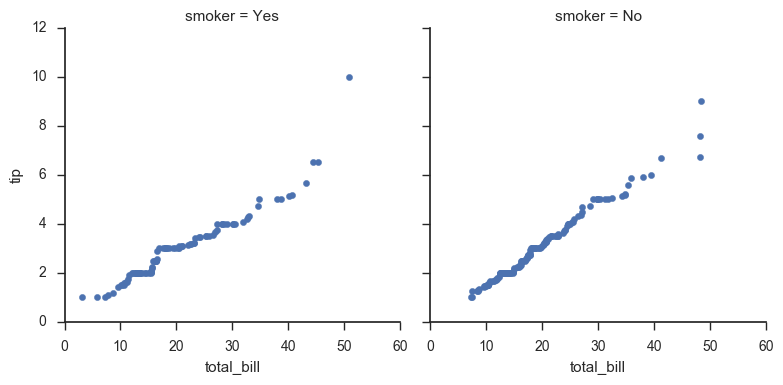

In [16]:
# make a bivariate plot, you should write the function so that 
# it accepts the x-axis variable first and the y-axis variable second:
def qqplot(x, y, **kwargs):
    _, xr = stats.probplot(x, fit=False)
    _, yr = stats.probplot(y, fit=False)
    plt.scatter(xr, yr, **kwargs)

g = sns.FacetGrid(tips, col="smoker", size=4)
g.map(qqplot, "total_bill", "tip");

- 因为plt.scatter能够使用color and label keyword，所以能使用hue
> - Because plt.scatter accepts color and label keyword arguments and does the right thing with them, we can add a hue facet without any difficulty:

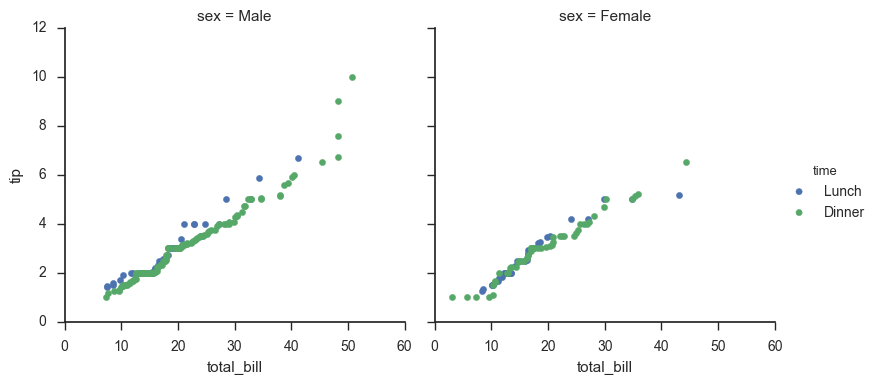

In [17]:
g = sns.FacetGrid(tips, hue="time", col="sex", size=4)
g.map(qqplot, "total_bill", "tip")
g.add_legend();

- 也能调节图形的其他外观
> - This approach also lets us use additional aesthetics to distinguish the levels of the hue variable, along with keyword arguments that won’t be depdendent on the faceting variables:

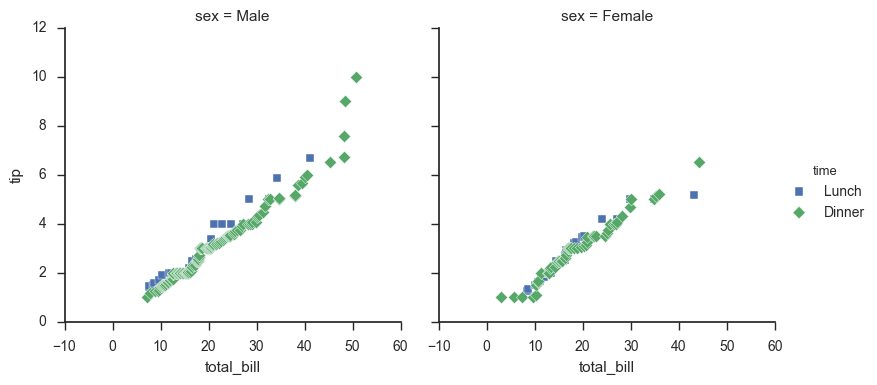

In [18]:
g = sns.FacetGrid(tips, hue="time", col="sex", size=4,
                  hue_kws={"marker": ["s", "D"]})
g.map(qqplot, "total_bill", "tip", s=40, edgecolor="w")
g.add_legend();

- 有时候个人函数即便有参数color and label也未必能够使用。这时，你会想自由操纵它们。
- this approach will allow use to map plt.hexbin, which otherwise does not play well with the FacetGrid API

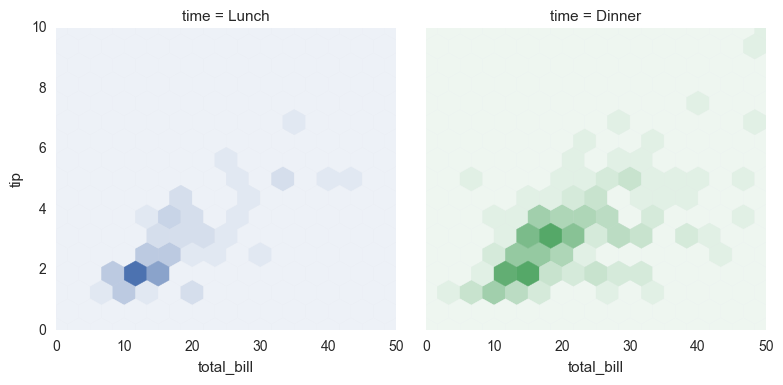

In [19]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

with sns.axes_style("dark"):
    g = sns.FacetGrid(tips, hue="time", col="time", size=4)
g.map(hexbin, "total_bill", "tip", extent=[0, 50, 0, 10]);